In [146]:
import requests
from PIL import Image

In [147]:
subscription_key = '017795b241eb4de6bbe2bd41c369a7d2'

In [148]:
assert subscription_key

In [150]:
face_api_url = 'https://20210504aiki.cognitiveservices.azure.com/face/v1.0/detect'

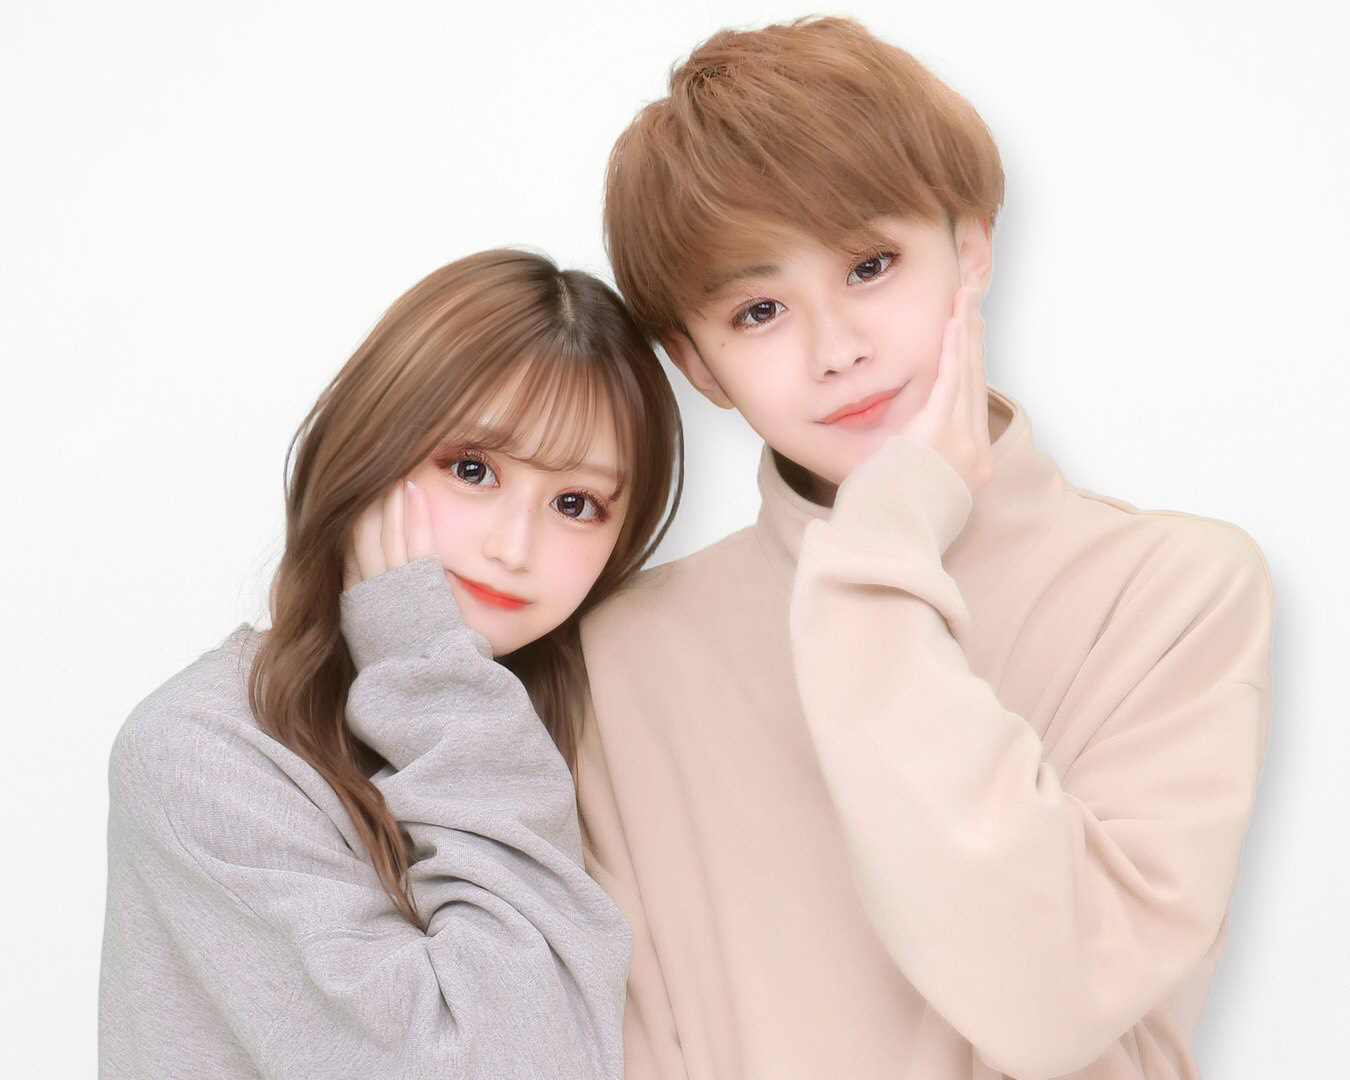

In [173]:
img = Image.open('sample_01.jpg')
img

In [152]:
with open('sample_01.jpg', 'rb') as f:
    binary_img = f.read()

In [153]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
    
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [154]:
res

<Response [200]>

In [182]:
result = res.json()
result

[{'faceId': '4d04cc64-f606-4478-b14f-13366cc7c554',
  'faceRectangle': {'top': 413, 'left': 367, 'width': 274, 'height': 274},
  'faceAttributes': {'smile': 0.139,
   'headPose': {'pitch': -5.4, 'roll': 18.4, 'yaw': 5.9},
   'gender': 'female',
   'age': 12.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.005,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.139,
    'neutral': 0.854,
    'sadness': 0.001,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.03},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.71},
   'noise': {'noiseLevel': 'low', 'value': 0.11},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.03,
    'invisible': False,
    'hairColor': [{'color': 'brown', 'confidence': 0.99},
     {'color': 'blo

In [186]:
rect = result[0]['faceRectangle']
rect

{'top': 413, 'left': 367, 'width': 274, 'height': 274}

In [187]:
age = result[0]['age']
print(age)

KeyError: 'age'

In [157]:
from PIL import ImageDraw

In [162]:
draw = ImageDraw.Draw(img)

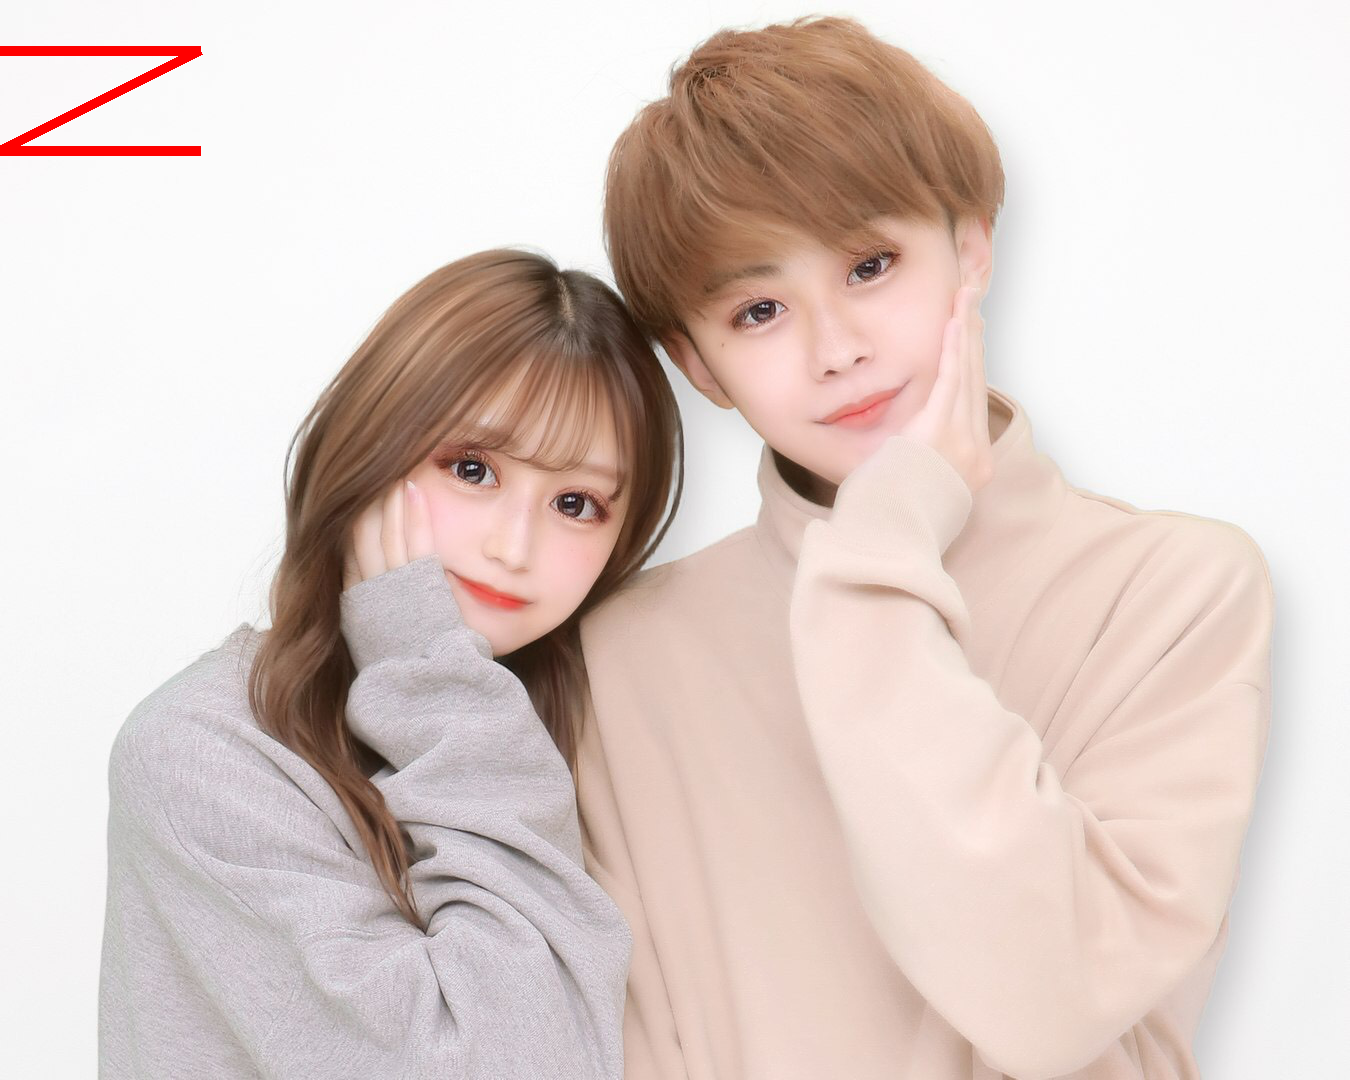

In [159]:
draw.line([(0, 50), (200, 50), (0, 150), (200, 150)], fill='red', width=10)
img

In [161]:
rect

{'top': 413, 'left': 367, 'width': 274, 'height': 274}

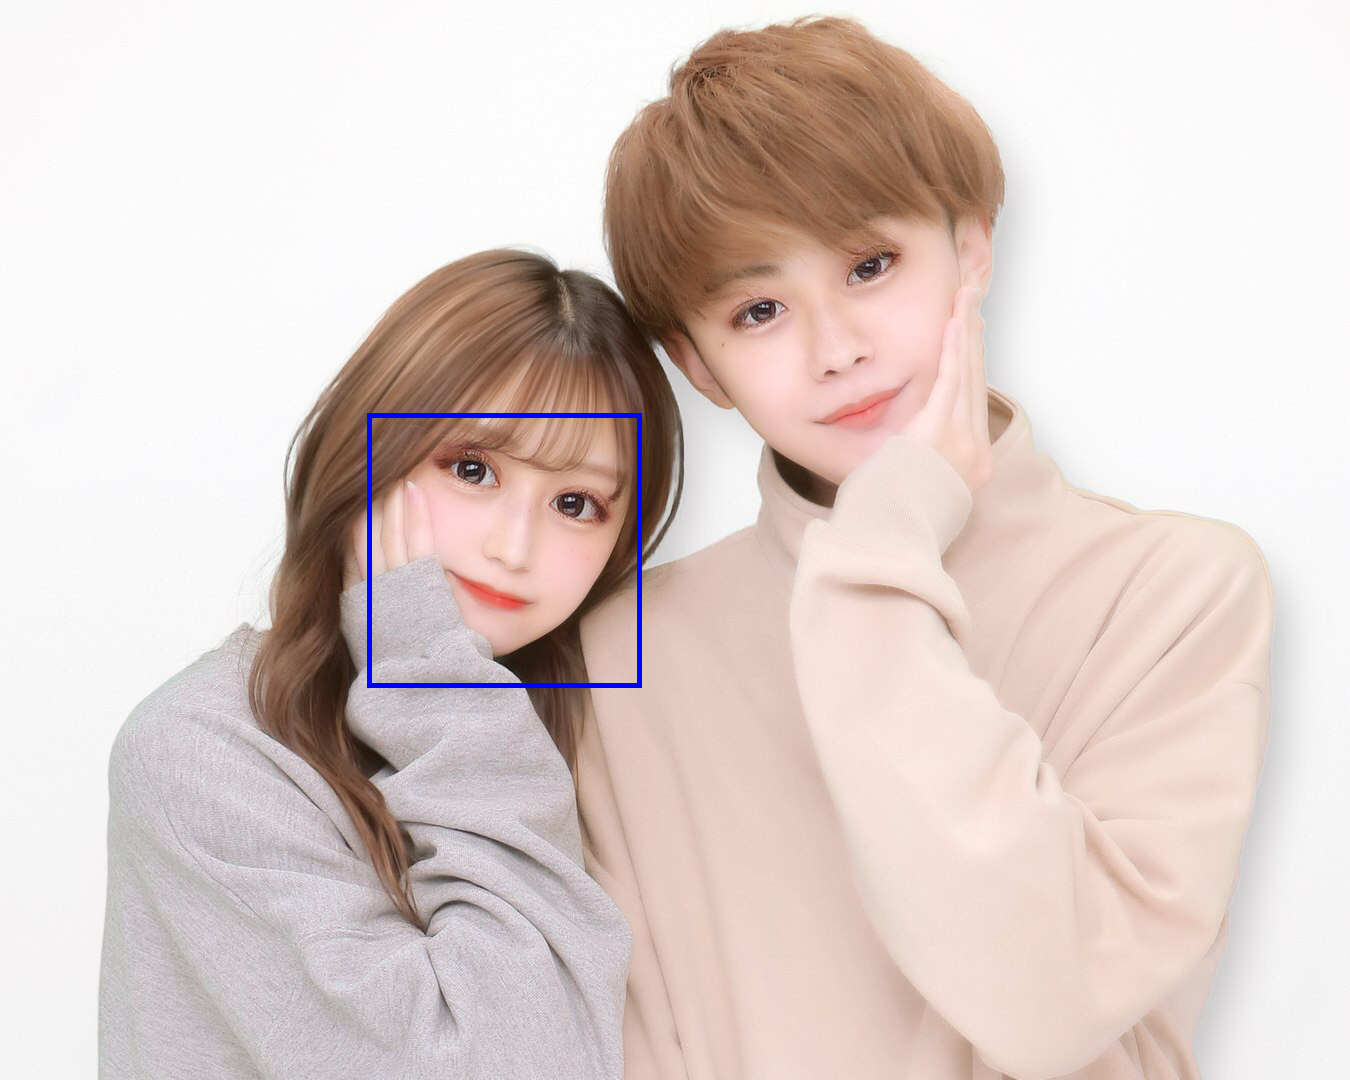

In [165]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='blue', width=5)
img

In [180]:
import requests
from PIL import Image
from PIL import ImageDraw
import io

subscription_key = '017795b241eb4de6bbe2bd41c369a7d2'
assert subscription_key

face_api_url = 'https://20210504aiki.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('sample_01.jpg')
with open('sample_01.jpg', 'rb') as f:
    binary_img = f.read()
    
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

results = res.json()
for result in results:
    rect = result['faceRectangle']
    age = result['age']
    gender = result['gender']
    
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='blue', width=5)
img

KeyError: 'age'

In [171]:
import io

In [ ]:
with io.BytesIO() as output:
    img.save(output, format='JPEG')
    binary_img = output.getvalue()